# ------------------------------------ FLAIR ------------------------------------

Flair is an advanced and versatile library for Natural Language Processing (NLP). Developed by Akbik et al. (2019), Flair offers a simple, unified interface for various types of word and document embeddings, thereby facilitating the training and dissemination of state-of-the-art models in NLP.

A key feature of Flair is its application in Named Entity Recognition (NER), particularly the flair/ner-english model. This model is specialized in identifying and classifying named entities (such as names of people, organizations, locations, etc.) in English language texts. It is notable for its high F1 score, indicating a balanced precision and recall, and underscoring its robustness in accurately identifying named entities (Vychegzhanin & Kotelnikov, 2019).

The versatility of Flair is further exemplified in its application across languages and specific domains. For instance, Oliveira et al. (2020) utilized Flair for POS-tagging in Brazilian Portuguese clinical texts, achieving an impressive accuracy of 92.39%. This adaptability highlights Flair's effectiveness in various linguistic and domain-specific contexts.

In conclusion, Flair is a user-friendly, efficient, and highly versatile tool in the realm of NLP, particularly in Named Entity Recognition. Its ability to interface with different types of embeddings and its proven efficacy across various languages and domains make it an invaluable tool for researchers and practitioners in NLP.

Sources:

1. Akbik, A., Bergmann, T., Blythe, D. A. J., Rasul, K., Schweter, S., & Vollgraf, R. (2019). FLAIR: An Easy-to-Use Framework for State-of-the-Art NLP
    - Link: https://aclanthology.org/C18-1139.pdf

2. Vychegzhanin, S., & Kotelnikov, E. (2019). Comparison of Named Entity Recognition Tools Applied to News Articles. 
    - Link: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8991165

3. Oliveira, L. F. A. de, Oliveira, L. E. S. e, Gumiel, Y. B., Carvalho, D., & Moro, C. (2020). Defining a state-of-the-art POS-tagging environment for Brazilian Portuguese clinical texts.
    - Link: https://link.springer.com/article/10.1007/s42600-020-00067-7 

Github: https://github.com/flairNLP/flair 

Hugging Face: https://huggingface.co/flair

## Libraries

In [26]:
from flair.data import Sentence
from flair.models import SequenceTagger
import pandas as pd     
import matplotlib.pyplot as plt
import numpy as np
import ast  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## testing Flair


In [5]:
#Code From Hugging Face Flair Docu: https://huggingface.co/flair/ner-english 
# load tagger
tagger = SequenceTagger.load("flair/ner-english")

# make example sentence
sentence = Sentence("George Washington went to Washington")

# predict NER tags
tagger.predict(sentence)

print(sentence)

# predicted NER spans
print('The following NER tags are found:')
# iterate over entities 
for entity in sentence.get_spans('ner'):
    print(entity)

2023-12-10 13:13:37,792 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
Sentence[5]: "George Washington went to Washington" → ["George Washington"/PER, "Washington"/LOC]
The following NER tags are found:
Span[0:2]: "George Washington" → PER (0.9985)
Span[4:5]: "Washington" → LOC (0.9706)


In [6]:
model = SequenceTagger.load('flair/ner-english')

2023-12-10 13:13:40,372 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


In [7]:
def tag_text(text, model):
    sentence = Sentence(text)
    model.predict(sentence)
    return [(entity.text, entity.tag) for entity in sentence.get_spans('ner')]

In [8]:
df_english = pd.read_json("../../data/dataset_english.json")
df_english

,masked_text,unmasked_text,privacy_mask,span_labels,bio_labels,tokenised_text
0,A students assessment was found on device bear...,A students assessment was found on device bear...,"{'[PHONEIMEI_1]': '06-184755-866851-3', '[JOBA...","[[0, 57, O], [57, 75, PHONEIMEI_1], [75, 138, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, B-PHON...","[a, student, s, assessment, was, found, on, de..."
1,"Dear [FIRSTNAME_1], as per our records, your l...","Dear Omer, as per our records, your license 78...","{'[FIRSTNAME_1]': 'Omer', '[VEHICLEVIN_1]': '7...","[[0, 5, O], [5, 9, FIRSTNAME_1], [9, 44, O], [...","[O, B-FIRSTNAME, I-FIRSTNAME, O, O, O, O, O, O...","[dear, om, ##er, ,, as, per, our, records, ,, ..."
2,[FIRSTNAME_1] could you please share your reco...,Kattie could you please share your recomndatio...,"{'[FIRSTNAME_1]': 'Kattie', '[AGE_1]': '72', '...","[[0, 6, FIRSTNAME_1], [6, 75, O], [75, 77, AGE...","[B-FIRSTNAME, I-FIRSTNAME, O, O, O, O, O, O, O...","[kat, ##tie, could, you, please, share, your, ..."
3,Emergency supplies in [BUILDINGNUMBER_1] need ...,Emergency supplies in 16356 need a refill. Use...,"{'[BUILDINGNUMBER_1]': '16356', '[MASKEDNUMBER...","[[0, 22, O], [22, 27, BUILDINGNUMBER_1], [27, ...","[O, O, O, B-BUILDINGNUMBER, I-BUILDINGNUMBER, ...","[emergency, supplies, in, 1635, ##6, need, a, ..."
4,"The [AGE_1] old child at [BUILDINGNUMBER_1], h...","The 88 old child at 5862, has showcased an unu...","{'[AGE_1]': '88', '[BUILDINGNUMBER_1]': '5862'...","[[0, 4, O], [4, 6, AGE_1], [6, 20, O], [20, 24...","[O, B-AGE, O, O, O, B-BUILDINGNUMBER, I-BUILDI...","[the, 88, old, child, at, 58, ##6, ##2, ,, has..."
...,...,...,...,...,...,...
43496,"Hello [FIRSTNAME_1], your cognitive therapy ap...","Hello Nellie, your cognitive therapy appointme...","{'[FIRSTNAME_1]': 'Nellie', '[DATE_1]': '8/21'...","[[0, 6, O], [6, 12, FIRSTNAME_1], [12, 66, O],...","[O, B-FIRSTNAME, O, O, O, O, O, O, O, O, B-DAT...","[hello, nellie, ,, your, cognitive, therapy, a..."
43497,"Dear [FIRSTNAME_1], we appreciate your active ...","Dear Jalon, we appreciate your active involvem...","{'[FIRSTNAME_1]': 'Jalon', '[CREDITCARDNUMBER_...","[[0, 5, O], [5, 10, FIRSTNAME_1], [10, 159, O]...","[O, B-FIRSTNAME, I-FIRSTNAME, O, O, O, O, O, O...","[dear, ja, ##lon, ,, we, appreciate, your, act..."
43498,"Dear [SEX_1] at [ZIPCODE_1], we are raising fu...","Dear Female at 32363-2779, we are raising fund...","{'[SEX_1]': 'Female', '[ZIPCODE_1]': '32363-27...","[[0, 5, O], [5, 11, SEX_1], [11, 15, O], [15, ...","[O, B-SEX, O, B-ZIPCODE, I-ZIPCODE, I-ZIPCODE,...","[dear, female, at, 323, ##6, ##3, -, 277, ##9,..."
43499,"Hello [FIRSTNAME_1], we encourage you to pay t...","Hello Tito, we encourage you to pay the fees o...","{'[FIRSTNAME_1]': 'Tito', '[ETHEREUMADDRESS_1]...","[[0, 6, O], [6, 10, FIRSTNAME_1], [10, 137, O]...","[O, B-FIRSTNAME, O, O, O, O, O, O, O, O, O, O,...","[hello, tito, ,, we, encourage, you, to, pay, ..."


In [13]:
df_small = df_english.head(100)

In [14]:
# function to check if specific tags are present in a row.
def check_data_tags(row, tags):
    return any(tag in str(row) for tag in tags)

# 'PER_flag', 'LOC_flag', and 'ORG_flag' will be set to True if the respective tags are found in the 'span_labels' column
df_small['PER_flag'] = df_small['span_labels'].apply(lambda row: check_data_tags(row, ['FIRSTNAME_', 'LASTNAME_', 'MIDDLENAME_']))
df_small['LOC_flag'] = df_small['span_labels'].apply(lambda row: check_data_tags(row, ['STREET_', 'STATE_', 'CITY_', 'COUNTRY_']))
df_small['ORG_flag'] = df_small['span_labels'].apply(lambda row: check_data_tags(row, ['COMPANYNAME_']))

df_small[['span_labels', 'PER_flag', 'LOC_flag', 'ORG_flag']]


/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_2116/3535696223.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['PER_flag'] = df_small['span_labels'].apply(lambda row: check_data_tags(row, ['FIRSTNAME_', 'LASTNAME_', 'MIDDLENAME_']))
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_2116/3535696223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['LOC_flag'] = df_small['span_labels'].apply(lambda row: check_data_tags(row, ['STREET_', 'STATE_', 'CITY_', 'COUNTRY_'

,span_labels,PER_flag,LOC_flag,ORG_flag
0,"[[0, 57, O], [57, 75, PHONEIMEI_1], [75, 138, ...",False,False,False
1,"[[0, 5, O], [5, 9, FIRSTNAME_1], [9, 44, O], [...",True,False,False
2,"[[0, 6, FIRSTNAME_1], [6, 75, O], [75, 77, AGE...",True,False,False
3,"[[0, 22, O], [22, 27, BUILDINGNUMBER_1], [27, ...",False,False,False
4,"[[0, 4, O], [4, 6, AGE_1], [6, 20, O], [20, 24...",False,False,False
...,...,...,...,...
95,"[[0, 24, O], [24, 25, CURRENCYSYMBOL_1], [25, ...",False,True,False
96,"[[0, 11, O], [11, 25, USERNAME_1], [25, 232, O...",False,False,False
97,"[[0, 48, O], [48, 64, COUNTY_1], [64, 168, O],...",False,False,False
98,"[[0, 8, O], [8, 13, FIRSTNAME_1], [13, 92, O],...",True,False,False


In [15]:
df_small['tagged_entities'] = df_small['unmasked_text'].apply(lambda text: tag_text(text, model))
df_small

/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_2116/2936497930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['tagged_entities'] = df_small['unmasked_text'].apply(lambda text: tag_text(text, model))


,masked_text,unmasked_text,privacy_mask,span_labels,bio_labels,tokenised_text,PER_flag,LOC_flag,ORG_flag,tagged_entities
0,A students assessment was found on device bear...,A students assessment was found on device bear...,"{'[PHONEIMEI_1]': '06-184755-866851-3', '[JOBA...","[[0, 57, O], [57, 75, PHONEIMEI_1], [75, 138, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, B-PHON...","[a, student, s, assessment, was, found, on, de...",False,False,False,[]
1,"Dear [FIRSTNAME_1], as per our records, your l...","Dear Omer, as per our records, your license 78...","{'[FIRSTNAME_1]': 'Omer', '[VEHICLEVIN_1]': '7...","[[0, 5, O], [5, 9, FIRSTNAME_1], [9, 44, O], [...","[O, B-FIRSTNAME, I-FIRSTNAME, O, O, O, O, O, O...","[dear, om, ##er, ,, as, per, our, records, ,, ...",True,False,False,"[(78B5R2MVFAHJ48500, MISC)]"
2,[FIRSTNAME_1] could you please share your reco...,Kattie could you please share your recomndatio...,"{'[FIRSTNAME_1]': 'Kattie', '[AGE_1]': '72', '...","[[0, 6, FIRSTNAME_1], [6, 75, O], [75, 77, AGE...","[B-FIRSTNAME, I-FIRSTNAME, O, O, O, O, O, O, O...","[kat, ##tie, could, you, please, share, your, ...",True,False,False,"[(Kattie, PER)]"
3,Emergency supplies in [BUILDINGNUMBER_1] need ...,Emergency supplies in 16356 need a refill. Use...,"{'[BUILDINGNUMBER_1]': '16356', '[MASKEDNUMBER...","[[0, 22, O], [22, 27, BUILDINGNUMBER_1], [27, ...","[O, O, O, B-BUILDINGNUMBER, I-BUILDINGNUMBER, ...","[emergency, supplies, in, 1635, ##6, need, a, ...",False,False,False,[]
4,"The [AGE_1] old child at [BUILDINGNUMBER_1], h...","The 88 old child at 5862, has showcased an unu...","{'[AGE_1]': '88', '[BUILDINGNUMBER_1]': '5862'...","[[0, 4, O], [4, 6, AGE_1], [6, 20, O], [20, 24...","[O, B-AGE, O, O, O, B-BUILDINGNUMBER, I-BUILDI...","[the, 88, old, child, at, 58, ##6, ##2, ,, has...",False,False,False,"[(Y2rWliOhf8Ir, MISC)]"
...,...,...,...,...,...,...,...,...,...,...
95,Need to make payment of [CURRENCYSYMBOL_1][AMO...,Need to make payment of ₩471362.04 for your pr...,"{'[CURRENCYSYMBOL_1]': '₩', '[AMOUNT_1]': '471...","[[0, 24, O], [24, 25, CURRENCYSYMBOL_1], [25, ...","[O, O, O, O, O, B-CURRENCYSYMBOL, O, O, I-AMOU...","[need, to, make, payment, of, ₩, ##47, ##13, #...",False,True,False,"[(Pfefferton, LOC)]"
96,"Customer - [USERNAME_1], as part of our recent...","Customer - Joe_Schuster53, as part of our rece...","{'[USERNAME_1]': 'Joe_Schuster53', '[PHONEIMEI...","[[0, 11, O], [11, 25, USERNAME_1], [25, 232, O...","[O, O, B-USERNAME, I-USERNAME, I-USERNAME, I-U...","[customer, -, joe, _, schuster, ##53, ,, as, p...",False,False,False,"[(Schuster53, ORG)]"
97,"For our market research, we will be focusing o...","For our market research, we will be focusing o...","{'[COUNTY_1]': 'Jefferson County', '[IP_1]': '...","[[0, 48, O], [48, 64, COUNTY_1], [64, 168, O],...","[O, O, O, O, O, O, O, O, O, O, B-COUNTY, I-COU...","[for, our, market, research, ,, we, will, be, ...",False,False,False,"[(Jefferson County, LOC)]"
98,"Welcome [FIRSTNAME_1], our Cryptocurrency 101 ...","Welcome Aidan, our Cryptocurrency 101 course u...","{'[FIRSTNAME_1]': 'Aidan', '[LITECOINADDRESS_1...","[[0, 8, O], [8, 13, FIRSTNAME_1], [13, 92, O],...","[O, B-FIRSTNAME, O, O, O, O, O, O, O, O, O, O,...","[welcome, aidan, ,, our, crypt, ##oc, ##ur, ##...",True,False,False,"[(Aidan, PER), (Cryptocurrency 101, MISC), (37..."


In [16]:
def check_model_tags(row, entity_type):
    #if the flag for this entity type is True in the current row
    if row[entity_type + '_flag']:
        # If flag is True -> check if the entity type is present in the tagged entities
        return any(entity_type in tag for _, tag in row['tagged_entities'])
    # If the flag is False, return False as this entity type is not expected in this row
    return False

# 'PER_tag', 'LOC_tag', 'ORG_tag' will be True if the respective entity type is correctly identified by the model
df_small['PER_tag'] = df_small.apply(lambda row: check_model_tags(row, 'PER'), axis=1)
df_small['LOC_tag'] = df_small.apply(lambda row: check_model_tags(row, 'LOC'), axis=1)
df_small['ORG_tag'] = df_small.apply(lambda row: check_model_tags(row, 'ORG'), axis=1)

df_small[['span_labels', 'PER_flag', 'LOC_flag', 'ORG_flag', 'tagged_entities', 'PER_tag', 'LOC_tag', 'ORG_tag']]


/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_2116/2674098560.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['PER_tag'] = df_small.apply(lambda row: check_model_tags(row, 'PER'), axis=1)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_2116/2674098560.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['LOC_tag'] = df_small.apply(lambda row: check_model_tags(row, 'LOC'), axis=1)
/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_2116/2674098560.py:12: 

,span_labels,PER_flag,LOC_flag,ORG_flag,tagged_entities,PER_tag,LOC_tag,ORG_tag
0,"[[0, 57, O], [57, 75, PHONEIMEI_1], [75, 138, ...",False,False,False,[],False,False,False
1,"[[0, 5, O], [5, 9, FIRSTNAME_1], [9, 44, O], [...",True,False,False,"[(78B5R2MVFAHJ48500, MISC)]",False,False,False
2,"[[0, 6, FIRSTNAME_1], [6, 75, O], [75, 77, AGE...",True,False,False,"[(Kattie, PER)]",True,False,False
3,"[[0, 22, O], [22, 27, BUILDINGNUMBER_1], [27, ...",False,False,False,[],False,False,False
4,"[[0, 4, O], [4, 6, AGE_1], [6, 20, O], [20, 24...",False,False,False,"[(Y2rWliOhf8Ir, MISC)]",False,False,False
...,...,...,...,...,...,...,...,...
95,"[[0, 24, O], [24, 25, CURRENCYSYMBOL_1], [25, ...",False,True,False,"[(Pfefferton, LOC)]",False,True,False
96,"[[0, 11, O], [11, 25, USERNAME_1], [25, 232, O...",False,False,False,"[(Schuster53, ORG)]",False,False,False
97,"[[0, 48, O], [48, 64, COUNTY_1], [64, 168, O],...",False,False,False,"[(Jefferson County, LOC)]",False,False,False
98,"[[0, 8, O], [8, 13, FIRSTNAME_1], [13, 92, O],...",True,False,False,"[(Aidan, PER), (Cryptocurrency 101, MISC), (37...",True,False,False


In [17]:
def calculate_and_print_metrics(df, entity_type):
    y_true = df[entity_type + '_flag']
    y_pred = df[entity_type + '_tag']

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    f2 = (5 * precision * recall) / ((4 * precision) + recall) if (precision + recall) != 0 else 0


    print(f"Metrics for {entity_type}:")
    print(f"  Accuracy:  {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall:    {recall:.2f}")
    print(f"  F1 Score:  {f1:.2f}")
    print(f"  F2 Score:  {f2:.2f}")
    print("------------------------------------------------")

calculate_and_print_metrics(df_small, 'PER')
calculate_and_print_metrics(df_small, 'LOC')
calculate_and_print_metrics(df_small, 'ORG')

Metrics for PER:
  Accuracy:  0.89
  Precision: 1.00
  Recall:    0.72
  F1 Score:  0.84
  F2 Score:  0.77
------------------------------------------------
Metrics for LOC:
  Accuracy:  0.96
  Precision: 1.00
  Recall:    0.73
  F1 Score:  0.85
  F2 Score:  0.77
------------------------------------------------
Metrics for ORG:
  Accuracy:  0.99
  Precision: 1.00
  Recall:    0.50
  F1 Score:  0.67
  F2 Score:  0.56
------------------------------------------------


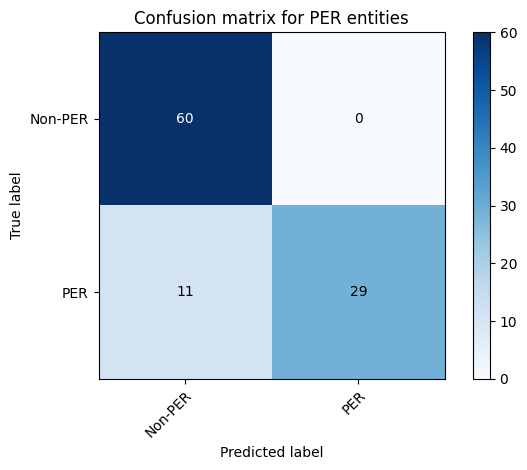

In [27]:
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

y_true = df_small['PER_flag'].values
y_pred = df_small['PER_tag'].values
plot_confusion_matrix(y_true, y_pred, classes=['Non-PER', 'PER'], title='Confusion matrix for PER entities')
plt.show()


True Negatives (TN): 60 - The model correctly identified 60 instances where tokens were not person entities.

False Positives (FP): 0 - The model did not incorrectly label any non-person tokens as person entities.

False Negatives (FN): 11 - The model missed 11 instances where it should have identified person entities.

True Positives (TP): 29 - The model correctly identified 29 instances of person entities.

## Conclusion:

Flair, despite its many strengths in the field of Natural Language Processing (NLP), shows certain limitations when it comes to the identification of Personally Identifiable Information (PII). One of the main reasons for this limitation lies in the model's parameters for Named Entity Recognition (NER). Flair's NER model, particularly the flair/ner-english version, typically identifies four categories of entities: persons, organizations, locations, and miscellaneous entities (MISC).

While this categorization covers a broad range of entities, it is somewhat limited in the context of PII. PII can encompass a wide variety of data types, including, but not limited to, email addresses, phone numbers, social security numbers, and other personal identifiers that go beyond the basic categories of person, organization, location, and miscellaneous. The lack of specificity in the model's parameters means that Flair might miss out on identifying many forms of sensitive data that are crucial in PII detection and protection.

Moreover, other models in the realm of NLP have extended their parameters to include a wider range of entity types. These models are capable of recognizing more specific types of PII, thereby providing a more comprehensive coverage in scenarios where the identification of sensitive information is critical. This broader range of entity recognition makes them more suitable for tasks that require rigorous PII identification and protection.

In conclusion, while Flair offers robust performance in general NER tasks, its limited set of entity categories in the context of PII identification might not be sufficient for tasks requiring detailed and extensive recognition of personal and sensitive data. The model's effectiveness is thus constrained in scenarios where a more exhaustive identification of PII is necessary, making other models with extended parameters more suitable for such specific applications.